# Importings libraries for my London housing data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style = 'white', font_scale = 1)
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

# Reading dataset

In [172]:
df = pd.read_csv('housing_in_london_monthly_variables.csv' , parse_dates= ['date'])
df.head(10)

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1
5,1995-06-01,city of london,94901,E09000001,17.0,NaN,1
6,1995-07-01,city of london,110128,E09000001,13.0,NaN,1
7,1995-08-01,city of london,112329,E09000001,14.0,NaN,1
8,1995-09-01,city of london,104473,E09000001,17.0,NaN,1
9,1995-10-01,city of london,108038,E09000001,14.0,NaN,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13549 non-null  datetime64[ns]
 1   area           13549 non-null  object        
 2   average_price  13549 non-null  int64         
 3   code           13549 non-null  object        
 4   houses_sold    13455 non-null  float64       
 5   no_of_crimes   7439 non-null   float64       
 6   borough_flag   13549 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 741.1+ KB


# Checking null values

In [40]:
df_checking_NaN = round(100 *(df.isna().sum()/df.shape[0]).sort_values(ascending = False) ,2)
df_null.to_frame(name = 'percent of NULL data (%)')

,percent of NULL data (%)
no_of_crimes,45.10
houses_sold,0.69
date,0.00
area,0.00
average_price,0.00
code,0.00
borough_flag,0.00


In [43]:
df['houses_sold'].fillna(df.groupby('area')['houses_sold'].transform('mean'), inplace = True)


In [44]:
df_filled_NAN = round(100 *(df.isna().sum()/df.shape[0]).sort_values(ascending = False) ,2)
df_filled_NAN.to_frame(name = 'percent of NULL data (%)')

,percent of NULL data (%)
no_of_crimes,45.1
date,0.0
area,0.0
average_price,0.0
code,0.0
houses_sold,0.0
borough_flag,0.0


# Dropping Coloumn no_of_crimes

In [46]:
df.drop("no_of_crimes", axis = 1, inplace = True)
df.head(10)

,date,area,average_price,code,houses_sold,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,1
1,1995-02-01,city of london,82203,E09000001,7.0,1
2,1995-03-01,city of london,79121,E09000001,14.0,1
3,1995-04-01,city of london,77101,E09000001,7.0,1
4,1995-05-01,city of london,84409,E09000001,10.0,1
5,1995-06-01,city of london,94901,E09000001,17.0,1
6,1995-07-01,city of london,110128,E09000001,13.0,1
7,1995-08-01,city of london,112329,E09000001,14.0,1
8,1995-09-01,city of london,104473,E09000001,17.0,1
9,1995-10-01,city of london,108038,E09000001,14.0,1


# Data processing

In [52]:
df.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
borough_flag              int64
dtype: object

In [65]:
df.insert (1, 'Year', df.date.dt.year)

In [67]:
df.tail(10)

,date,Year,area,average_price,code,houses_sold,borough_flag
13539,2019-04-01,2019,england,245077,E92000001,59710.000000,0
13540,2019-05-01,2019,england,245255,E92000001,65387.000000,0
13541,2019-06-01,2019,england,246140,E92000001,66723.000000,0
13542,2019-07-01,2019,england,248562,E92000001,70681.000000,0
13543,2019-08-01,2019,england,249432,E92000001,75079.000000,0
13544,2019-09-01,2019,england,249942,E92000001,64605.000000,0
13545,2019-10-01,2019,england,249376,E92000001,68677.000000,0
13546,2019-11-01,2019,england,248515,E92000001,67814.000000,0
13547,2019-12-01,2019,england,250410,E92000001,77182.732441,0
13548,2020-01-01,2020,england,247355,E92000001,77182.732441,0


In [70]:
df = df[df['Year'] < 2020]
df['Year'].max()

2019

In [71]:
df.tail(10)

,date,Year,area,average_price,code,houses_sold,borough_flag
13538,2019-03-01,2019,england,243281,E92000001,64940.000000,0
13539,2019-04-01,2019,england,245077,E92000001,59710.000000,0
13540,2019-05-01,2019,england,245255,E92000001,65387.000000,0
13541,2019-06-01,2019,england,246140,E92000001,66723.000000,0
13542,2019-07-01,2019,england,248562,E92000001,70681.000000,0
13543,2019-08-01,2019,england,249432,E92000001,75079.000000,0
13544,2019-09-01,2019,england,249942,E92000001,64605.000000,0
13545,2019-10-01,2019,england,249376,E92000001,68677.000000,0
13546,2019-11-01,2019,england,248515,E92000001,67814.000000,0
13547,2019-12-01,2019,england,250410,E92000001,77182.732441,0


# Data exploration

In [73]:
df['borough_flag'].unique()

array([1, 0], dtype=int64)

In [76]:
# London borough details

london_borough = df[df['borough_flag'] == 1]['area'].unique()
len(london_borough)

33

In [128]:
england_borough = df[df['borough_flag'] == 0]['area'].unique()
len(england_borough)

12

In [78]:
print(london_borough)

['city of london' 'barking and dagenham' 'barnet' 'bexley' 'brent'
 'bromley' 'camden' 'croydon' 'ealing' 'enfield' 'tower hamlets'
 'greenwich' 'hackney' 'hammersmith and fulham' 'haringey' 'harrow'
 'havering' 'hillingdon' 'hounslow' 'islington' 'kensington and chelsea'
 'kingston upon thames' 'lambeth' 'lewisham' 'merton' 'newham' 'redbridge'
 'richmond upon thames' 'southwark' 'sutton' 'waltham forest' 'wandsworth'
 'westminster']


In [129]:
print(england_borough)

['south east' 'inner london' 'outer london' 'north east' 'north west'
 'yorks and the humber' 'east midlands' 'west midlands' 'east of england'
 'london' 'south west' 'england']


In [81]:
london_region = df[df['area'].isin(london_borough)]
print(london_region)

           date  Year            area  average_price       code  houses_sold  \
0    1995-01-01  1995  city of london          91449  E09000001     17.00000   
1    1995-02-01  1995  city of london          82203  E09000001      7.00000   
2    1995-03-01  1995  city of london          79121  E09000001     14.00000   
3    1995-04-01  1995  city of london          77101  E09000001      7.00000   
4    1995-05-01  1995  city of london          84409  E09000001     10.00000   
...         ...   ...             ...            ...        ...          ...   
9932 2019-08-01  2019     westminster         914870  E09000033    156.00000   
9933 2019-09-01  2019     westminster         925955  E09000033    169.00000   
9934 2019-10-01  2019     westminster         927864  E09000033    168.00000   
9935 2019-11-01  2019     westminster         955615  E09000033    150.00000   
9936 2019-12-01  2019     westminster         968404  E09000033    356.83612   

      borough_flag  
0                1

In [176]:
england_region = df[df['area'].isin(england_borough)]
print(england_region)

            date          area  average_price       code  houses_sold  \
3355  1998-04-01    south east          83176  E09000012          NaN   
3356  1998-04-01    south east          83176  E12000008      15354.0   
9938  1995-01-01  inner london          78252  E13000001       2890.0   
9939  1995-02-01  inner london          75886  E13000001       2583.0   
9940  1995-03-01  inner london          76592  E13000001       3643.0   
...          ...           ...            ...        ...          ...   
13544 2019-09-01       england         249942  E92000001      64605.0   
13545 2019-10-01       england         249376  E92000001      68677.0   
13546 2019-11-01       england         248515  E92000001      67814.0   
13547 2019-12-01       england         250410  E92000001          NaN   
13548 2020-01-01       england         247355  E92000001          NaN   

       no_of_crimes  borough_flag  
3355            NaN             0  
3356            NaN             0  
9938           

# Comparing average prices date-wise London vs England

In [174]:
london_region_price = london_region.groupby('date')['average_price'].mean()
england_region_price = england_region.groupby('date')['average_price'].mean()

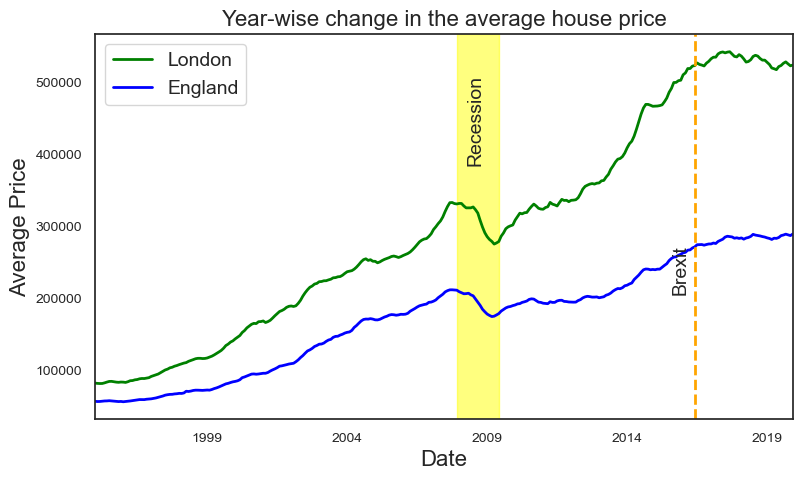

In [175]:
plt.figure(figsize = (9, 5))

london_region_price.plot(y = 'average_price', color = 'green', lw = 2, label = 'London')
england_region_price.plot(y = 'average_price', color = 'blue', lw = 2, label = 'England')

plt.axvspan('2007-12-01', '2009-06-01', alpha = 0.5, color = 'yellow')
plt.text(x = '2008-04-01', y = 390000, s = 'Recession', rotation = 90, fontsize = 14)
plt.axvline(x = '2016-06-23', lw = 2, color = 'orange', linestyle = '--')
plt.text(x = '2015-08-01', y = 210000, s = 'Brexit', rotation = 90, fontsize = 14)

plt.title('Year-wise change in the average house price', size = 16)
plt.ylabel('Average Price', size = 16)
plt.xticks(size = 10)
plt.xlabel('Date', size = 16)
plt.yticks(size = 10)
plt.legend(fontsize = 14);

# Average price of 10 most expensive area within London

In [108]:
london_region_price_top = london_region.groupby('area')['average_price'].mean()
london_region_price_top10 = london_region_price_top.sort_values(ascending = False).to_frame()
print("Top 10 expensive area in London boroughs")
london_region_price_top10.head(10)

Top 10 expensive area in London boroughs


,average_price
area,
kensington and chelsea,740606.683333
westminster,542282.063333
camden,466358.253333
hammersmith and fulham,442773.376667
city of london,422771.363333
richmond upon thames,381640.966667
islington,364160.283333
wandsworth,341411.026667
barnet,304272.120000


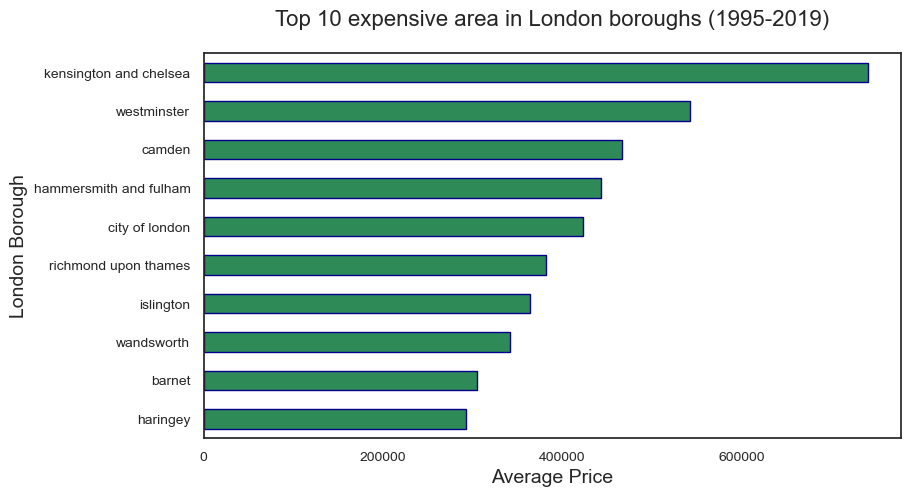

In [122]:
london_region_price_top10.head(10).sort_values(by = 'average_price', ascending = True).plot(kind = 'barh', figsize = (9, 5), 
                                                                               color = 'seagreen', edgecolor = 'darkblue',
                                                                               legend = False)

plt.title('Top 10 expensive area in London boroughs (1995-2019)', size = 16, y = 1.05)
plt.ylabel('London Borough', size = 14)
plt.yticks(size = 10)
plt.xlabel('Average Price', size = 14)
plt.xticks([0, 200_000, 400_000, 600_000], size = 10);

# Comparing 10 most expensive areas in England

In [127]:
england_region_price_top = england_region.groupby('area')['average_price'].mean()
england_region_price_top10 = england_region_price_top.sort_values(ascending = False).to_frame()
print("Top 10 expensive area in England")
england_region_price_top10.head(10)

Top 10 expensive area in England


,average_price
area,
inner london,314104.606667
london,264813.856667
outer london,238753.886667
south east,195653.013289
east of england,170796.173333
south west,163050.030000
england,152754.556667
west midlands,126857.756667
east midlands,121403.033333


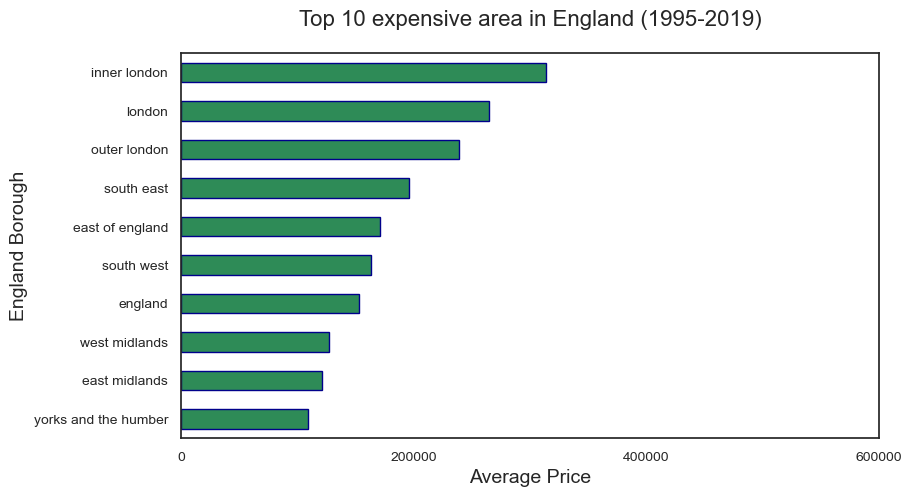

In [131]:
england_region_price_top10.head(10).sort_values(by = 'average_price', ascending = True).plot(kind = 'barh', figsize = (9, 5), 
                                                                               color = 'seagreen', edgecolor = 'darkblue',
                                                                               legend = False)

plt.title('Top 10 expensive area in England (1995-2019)', size = 16, y = 1.05)
plt.ylabel('England Borough', size = 14)
plt.yticks(size = 10)
plt.xlabel('Average Price', size = 14)
plt.xticks([0, 200_000, 400_000, 600_000], size = 10);

# Top 5 most expensive areas in England and its prices change with date

In [134]:
england_region_prices = england_region.groupby('area')['average_price'].mean()
england_top5_prices = england_region_prices.sort_values(ascending = False).to_frame()

print('Top 5 expensive regions in England')
england_top5_prices.head(5)

Top 5 expensive regions in England


,average_price
area,
inner london,314104.606667
london,264813.856667
outer london,238753.886667
south east,195653.013289
east of england,170796.173333


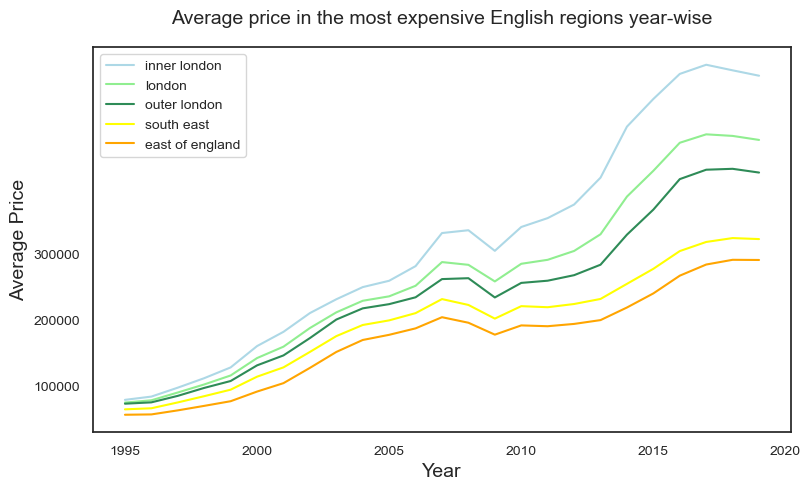

In [145]:
top5_region_indeces = england_top5_prices.head(5).index
colors = ['lightblue', 'lightgreen', 'seagreen', 'yellow', 'orange', ]

plt.figure(figsize = (9, 5))

for index, i in enumerate(top5_region_indeces):
    df_ = england_region[england_region['area'] == i]
    df_ = df_.groupby('Year')['average_price'].mean()
    df_.plot(y = 'average_price', label = i, color = colors[index])

plt.title('Average price in the most expensive English regions year-wise', size = 14, y = 1.04)
plt.xlabel('Year', size = 14)
plt.xticks(size = 10)
plt.ylabel('Average Price', size = 14)
plt.yticks([100_000, 200_000, 300_000], size = 10)
plt.legend(fontsize = 10);

# Houses sold in London date-wise

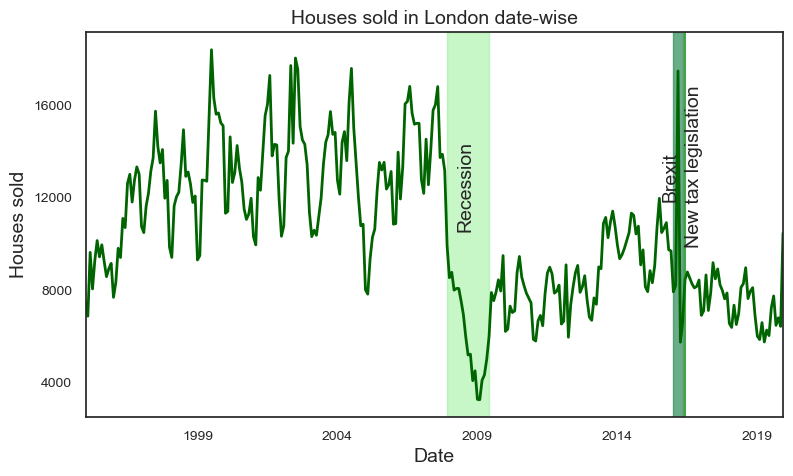

In [166]:
london_houses = london_region.groupby('date')['houses_sold'].sum()
london_houses.plot(figsize = (9, 5), lw = 2, y = 'houses_sold', color = 'darkgreen')

plt.axvspan('2007-12-21', '2009-06-21', alpha = 0.5, color = 'lightgreen')
plt.text(x = '2008-04-01', y = 10700, s = 'Recession', rotation = 90, fontsize = 14)
plt.axvspan('2016-01-1', '2016-05-01', alpha = 0.7, color = 'seagreen')
plt.text(x = '2016-06-01', y = 10000, s = 'New tax legislation', rotation = 90, fontsize = 14)
plt.axvline(x = '2016-06-23', alpha = 0.7, color = 'green')
plt.text(x = '2015-08-01', y = 12000, s = 'Brexit', rotation = 90, fontsize = 14)

plt.title('Houses sold in London date-wise', size = 14)
plt.xlabel('Date', size = 14)
plt.xticks(size = 10)
plt.ylabel('Houses sold', size = 14)
plt.yticks([4000, 8000, 12000, 16000], size = 10);

# Conclusion

Following are the conclusions:

Comparitively the average price in London boroughs is higher than the rest of England. It has been affected by finacial crisis like recession and political events like Brexit.

Kensighton & Chelsea and Westiminister are the regions have the highest average price.

A gradual decrease in houses sold after the recession and Brexit is observed.

Hence, both political and financial events infuenced the average prices and houses sold.

# Future Development
 
 Explore further the London housing yearly dataset.